
# Aim
This aim of this project is to run some data analysis on real data obtained from airbnb. The analysis is done in Python 3.5. It is dependents on the following libraries:
- Matplotlib 1.5.3
- Numpy 1.11.1
- Pandas 0.18.1

# Project Requirements
The final submission is a Jupyter notebook that contains: 
- Markdown sections defining which question below that are being answered, as well as some text describing the approach where applicable. 
- A few sentences describing what has been observed from the analysis. 
- The notebook includes all of the code written to answer the questions. 
- The submittion of the  final Jupyter notebook is available on gist.

# Data Source 
The data used for this project comes from the folloiwing airbnb website - http://insideairbnb.com/get-the-data.html 

- Part A uses the 'listings.csv' for Paris, dated '03 July, 2016'. It provides summary information and metrics for listings in Paris.

- Part B uses the 'calendar.csv.gz' for Paris, dated '03 July, 2016'. It provides a detailed calendar data for listings in Paris

In [1]:
print("Start matplotlib inline")
#This line is required to ensure the graphs/plots are embedded in the jupyter notebook, 
#without this tag, the code would still work but the graphs/plots would show in a floating window
%matplotlib inline
print("End matplotlib inline")

Start matplotlib inline
End matplotlib inline


# Library Loading
Loading libraries is required as ....  
I chose to have a section to load all libraries at once at the beginning of the notebook project to favour separation of concerns and avoid code cluttering.   

In [2]:
print("Start Loading Libraries")
import matplotlib.pyplot as plt
import numpy as np
import numpy.ma as ma
import pandas as pd
import random

from datetime import datetime
from pandas import DataFrame, Series
from pylab import *
print("End Loading Libraries")

print("Start Ignore Warnings")
import warnings
warnings.filterwarnings('ignore')
print("End Ignore Warnings")

Start Loading Libraries
End Loading Libraries
Start Ignore Warnings
End Ignore Warnings


# Shared Functions
This area is dedicated to functions that are used across the notebook.
This helps with seggregation of duty, avoid code duplication and help improve general code maintenance.

In [202]:
print ("Start Shared Function")
def plot_data(title, xLabel, yLabel, legendLocation):
    plt.legend(loc=legendLocation)
    plt.xlabel(xLabel)
    plt.ylabel(yLabel)
    plt.title(title)
    plt.show()

def plot_error_bars(x,y,y_error,label):
    plt.figure(figsize=(12, 9))
    plt.errorbar(x, y, xerr=0, yerr=y_error, ls='dotted', color='blue',  
                 fmt='o', label=label)
    ax = plt.gca()
    #prevent the scientific notation...
    ax.get_xaxis().get_major_formatter().set_scientific(False)
    
#create a bar chart
def bar_plot(position, data_frame, colour, label):
    plt.bar(position,
            data_frame,
            width =.25,
            alpha=0.5,
            color=colour,
            label= room_type[0])
    
print("End Shared Function")

Start Shared Function
End Shared Function


# Part A - Data Import and Basics
The following section answers the following points:
1. Import the listings.csv data into the notebook.
2. Listing count in Paris.
3. The minimum and maximum price (per night) for a room in Paris. 
4. The listing that has the maximum number of minimum_nights stay. 
5. The different room type’s offered in Paris.
-------------------------------------------------------------------------

A.1 Import the listings.csv data into the notebook.

The Pandas library was the prefered library choice, as it loads the data efficiently into memory and it is feature rich (i.e. help with code productivity).

In [4]:
df_listing = pd.read_csv("listings.csv")

A.2 Listing count in Paris.

Assuming that one listing corresponds to one row in the spreadsheet, then the number of listing is provided below.

In [5]:
print ("The number of listing in paris is: " + str(len(df_listing.index)))

The number of listing in paris is: 52725


A.3.The minimum and maximum price (per night) for a room in Paris.

The aim is to target the Paris column and find its min/max

In [6]:
print ("The min price is: " + str(df_listing[['price']].min(axis=0)[0]))
print ("The max price is: " + str(df_listing[['price']].max(axis=0)[0]))

The min price is: 0
The max price is: 6081


It is surprising to see that the 'min price' is 0. It could be attributed to a data errors or other factors. Further investigations would be required to establish the cause of this.

A.4. The listing that has the maximum number of minimum_nights stay. 

In [7]:
minimum_nights = df_listing[['minimum_nights']].max(axis=0)[0]
print ("The maximum number of 'minimum_nights' is: " + str(minimum_nights))
print ("")
print ("Details of the corresponding 'listing_id' is provided below")
df_listing[df_listing['minimum_nights'] == minimum_nights]

The maximum number of 'minimum_nights' is: 1000

Details of the corresponding 'listing_id' is provided below


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
20353,10155434,Beau studio de 18m2 à Bastille,52122026,Tristan,NaN,Reuilly,48.847956,2.367961,Entire home/apt,39,1000,3,2016-02-18,0.48,1,19


A.5.The different room type’s offered in Paris.

In [8]:
for roomType in df_listing['room_type'].unique():
    print(roomType)

Entire home/apt
Private room
Shared room


# Part B - Data Analysis...
1. Import calendar data 
2. List the dates that have been booked as well as dates that have been booked vs not booked. 
3. Plot a histogram of the dates which have been booked.
4. Add to a histogram of the dates which have not been booked. 
-------------------------------------------------------------------------

B.1. Import Calendar data & List dates that have been booked/not booked for a random property with at least 5 bookings. 

In [41]:
print("a) Import the calendar data into the notebook")
print("b) The compression parameter is set to 'infer' as default, as 'gz' is a supported format, there is not need to specify this parameter.")
dtypes = {'listing_id':int, 'date': str, 'available':str, 'price':str} 
df = pd.read_csv("calendar.csv.gz",dtype=dtypes)
print("c) Let's have a look at the raw data set to have a feeling about the data and schema.")
print(df)
print("")
print("d) Let's carry on with the interesting things now...")

#list the rooms that are not available, i.e. the booked rooms.
roomBooked = df[df['available'] == 'f']

#group them by listing_id, count and list properties with at least 5 booking
roomBookedGroupedByListingId = roomBooked.groupby('listing_id')
roomBookedGrouped = roomBookedGroupedByListingId.count() > 5  
listingIds = roomBookedGrouped.index.get_level_values('listing_id')
print("Print available listing ids that contains 5 bookings or more")
print(listingIds)
print("")

import random
listingIdRdm = random.choice(listingIds)
print("Random listing id: " + str(listingIdRdm))
print("")

print("Random property with at least 5 bookings:")
roomBookedRdm = roomBooked[roomBooked['listing_id'] == listingIdRdm]
#roomBookedRdm = roomBooked[roomBooked['listing_id'] == 6668752]
print(roomBookedRdm)
print("")

a) Import the calendar data into the notebook
b) The compression parameter is set to 'infer' as default, as 'gz' is a supported format, there is not need to specify this parameter.
c) Let's have a look at the raw data set to have a feeling about the data and schema.
          listing_id        date available price
0            6159911  2017-06-12         f   NaN
1            6159911  2017-06-11         f   NaN
2            6159911  2017-06-10         f   NaN
3            6159911  2017-06-09         f   NaN
4            6159911  2017-06-08         f   NaN
5            6159911  2017-06-07         f   NaN
6            6159911  2017-06-06         f   NaN
7            6159911  2017-06-05         f   NaN
8            6159911  2017-06-04         f   NaN
9            6159911  2017-06-03         f   NaN
10           6159911  2017-06-02         f   NaN
11           6159911  2017-06-01         f   NaN
12           6159911  2017-05-31         f   NaN
13           6159911  2017-05-30         f   Na

In [42]:
#get the dataframe for the selectec listing_id
allDatesForSelectedProperty = df[df['listing_id'] == listingIdRdm] 

#get the list of rooms booked from the dataframe (i.e 'available' =='f'))
datesBookedCount = allDatesForSelectedProperty[allDatesForSelectedProperty['available'] == 'f'].count()[0]
print('The number of dates booked for the selected property: ' +str(datesBookedCount))

#get the list of rooms not booked from the dataframe (i.e 'available' !='f'))
datesNotBookedCount = allDatesForSelectedProperty[allDatesForSelectedProperty['available'] != 'f'].count()[0]
print('The number of dates not booked for the selected property: ' +str(datesNotBookedCount))

#get the total list of booked rooms
allDatesForSelectedPropertyCount = allDatesForSelectedProperty.count()[0]
print('Total number of dates for the selected property: ' +str(allDatesForSelectedPropertyCount))
print('The ratio if booked rooms is: '+ str(100.0 * float(datesBookedCount)/float(allDatesForSelectedPropertyCount)) +'%')

The number of dates booked for the selected property: 126
The number of dates not booked for the selected property: 239
Total number of dates for the selected property: 365
The ratio if booked rooms is: 34.52054794520548%


In [43]:
print("34.5% of the room are booked with airbnb for the selected property.")
print("It would be interesting to know whether this property booking rates is an outlier,")
print("or whether this is the case for most Pariasian property in 2016/2017.")
print("It would also be interesting to analyse the trend over the past few years.")

34.5% of the room are booked with airbnb for the selected property.
It would be interesting to know whether this property booking rates is an outlier,
or whether this is the case for most Pariasian property in 2016/2017.
It would also be interesting to analyse the trend over the past few years.


B.2 Plot a histogram of the dates which have been booked (for all properties).

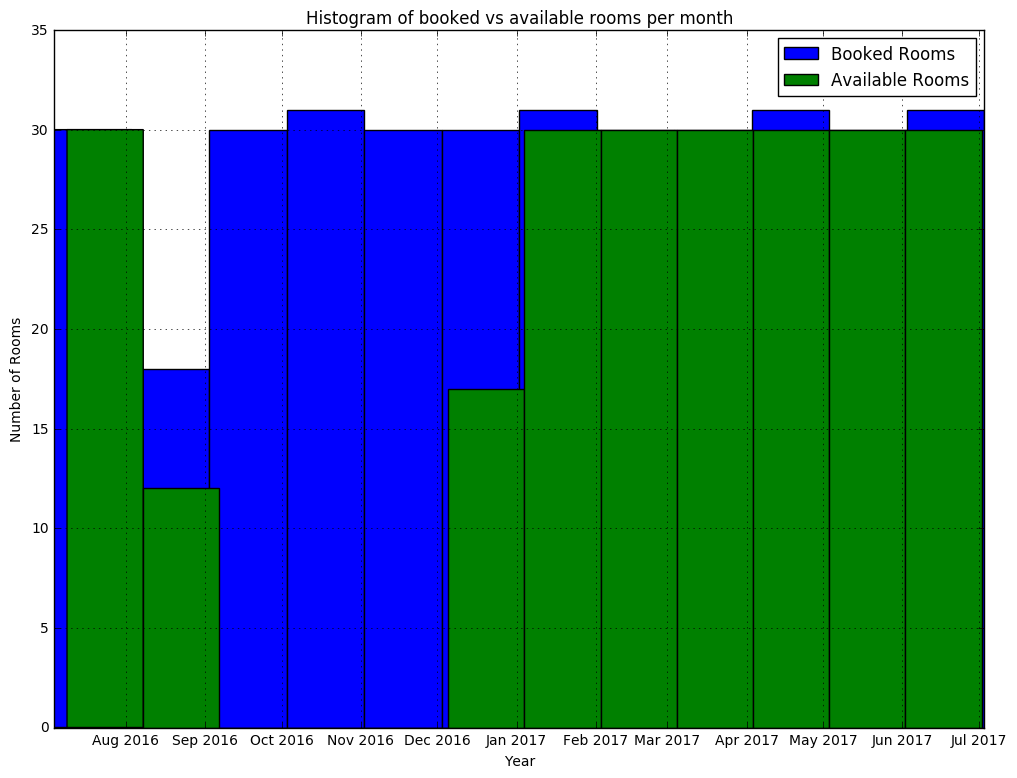

In [44]:
#convert dates to datetime64 for the room booked dataset
roomBookedRdm['date'] = pd.to_datetime(roomBookedRdm['date'], coerce=True)
roomBookedRdm.date = roomBookedRdm.date.values.astype("datetime64")

#convert dates to datetime64 for the availabe room dataset
roomNotBookedRdm = allDatesForSelectedProperty[allDatesForSelectedProperty['available'] != 'f']
roomNotBookedRdm['date'] = pd.to_datetime(roomNotBookedRdm['date'], coerce=True)
roomNotBookedRdm.date = roomNotBookedRdm.date.values.astype("datetime64")

#create histogram...
roomBookedRdm.date.hist(bins=12, color="blue", stacked=False, fill=True, label='Booked Rooms',figsize=(12, 9))
roomNotBookedRdm.date.hist(bins=12, color="green", stacked=False, fill=True, label='Available Rooms',figsize=(12, 9))
#user defined function to plot the data, see above
plot_data('Histogram of booked vs available rooms per month','Year', 'Number of Rooms','upper right')


# Part C - Data Analysis (Continued)...
1. Plot the average price for 10 random listings in the selected data.
2. Find the listings which vary their price depending on the date. 
How many are there in the dataset? 
3. Modify the plot in step 1 to illustrate the standard deviation of the prices in the original figure. 
4. Plot the average price (including standard deviation) of all the listings which have a standard deviation 
greater than 0 in the  selected data.
-------------------------------------------------------------------------

1.Plot the average price for 10 random listings in the selected data.

In [92]:
#Cleans the raw data set    
print("Data cleaning layer...")
#As prices can be NaN, it was decided to remove these rows from the dataset. The reason being when
#we do aggregated caculation such as Avg, setting Nan to 0 skews the final result.
print("a)Remove rows with price=NaN")
df=df[df.price.notnull()]
#The price is a string, e.g. $45.00, therefore we cannot use this column to perform calculation.
#We will i) create another column, ii)strip out the string number part, 
#and iii) remove the ',' in the digits from e.g. 2,500.00 to 2500.00, and finally
#iv) convert it to a float column type
print("b)Create the column 'price_as_float'")
df['price_as_float']= df['price'].map(lambda x: str(x.replace(',', ''))[1:])
#ensure the 'priceAsFloat' col type is float
df['price_as_float'] = df['price_as_float'].astype(float)
print("c)Ensure 'listing_id' contains no white space")
df['listing_id'] = df['listing_id'].astype(str)
df['listing_id'] = df['listing_id'].map(lambda x: str(x.strip()))
print("Cleaned Data")
print(df)

print("List the 10 random selected listing_ids:")
listingIds = df['listing_id']
print('Count unique listing_ids')
uniqueListingIds = listingIds.unique()
uniqueListingIdCount = uniqueListingIds.size

print("Data quality check...")
#Catch all... We do not know whether there will be a sufficient number of unique listing_ids (i.e. 10 in this case)
#to run the analysis on. 
#case 1 - If this is not the case, then we'll take all there is. 
#case 2 - If there is none, then I raise an exception.
try: 
    if (uniqueListingIdCount == 0):
        raise Exception('uniqueListingIdCount must be > 0', '')
except Exception as ex:
    print (ex.args)    

maxListingNb = 10
if (uniqueListingIdCount < maxListingNb):
    print("The number of listingIds in this dataset is < " + str(maxListingNb))
    print("We will therefore use maxListingNb=" + str(uniqueListingIdCount))
    maxListingNb = uniqueListingIdCount

print("")
print("Let's continue with the analysis...")    

print("Max number of listings to use: " + str(maxListingNb))
print("List the 10 random selected listing_ids:")
sampleListingIds = random.sample(uniqueListingIds.tolist(), maxListingNb)
print(sampleListingIds)

print("")
print("Let's have a peek at the data...")
sampleListingIds = df.loc[df['listing_id'].isin(sampleListingIds)]
print(sampleListingIds)


Data cleaning layer...
a)Remove rows with price=NaN
b)Create the column 'price_as_float'
c)Ensure 'listing_id' contains no white space
Cleaned Data
         listing_id        date available   price  price_as_float
254         6159911  2016-10-01         t  $50.00            50.0
255         6159911  2016-09-30         t  $50.00            50.0
256         6159911  2016-09-29         t  $50.00            50.0
257         6159911  2016-09-28         t  $50.00            50.0
258         6159911  2016-09-27         t  $50.00            50.0
259         6159911  2016-09-26         t  $50.00            50.0
260         6159911  2016-09-25         t  $50.00            50.0
261         6159911  2016-09-24         t  $50.00            50.0
262         6159911  2016-09-23         t  $50.00            50.0
263         6159911  2016-09-22         t  $50.00            50.0
264         6159911  2016-09-21         t  $50.00            50.0
265         6159911  2016-09-20         t  $50.00           

Plot the data
             avg_price
listing_id            
10044768     49.545455
10561174     40.000000
12295512     65.596026
13741238     65.000000
1379557      55.000000
2993397      38.104167
3756068      60.684932
3894246     120.063492
5263608      78.900000
8627804     129.000000


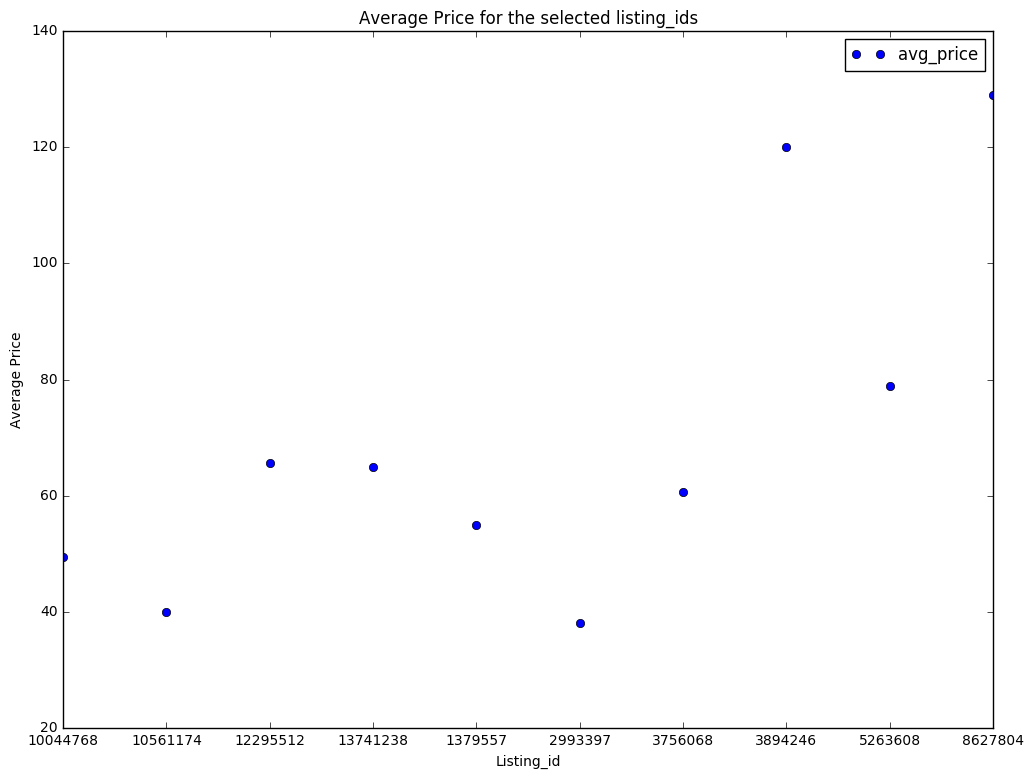

In [94]:
#ensure listing_ids are sorted... Important for later, see point 3.below. We will need to store the data into a dataframe and then 
#perform a calculation accross col. It is important we perform the calculation on the same listing_id (hence the ordering importance)
sampleListingIds = sampleListingIds.sort(['listing_id'],ascending=True)
print("Plot the data")
avgPriceDataFrame = sampleListingIds.groupby(['listing_id']).mean().rename(columns={'price_as_float':'avg_price'})
print(avgPriceDataFrame)
avgPriceDataFrame.plot(linestyle='', marker='o', color='blue', label='Average Price', figsize=(12, 9))
#user defined function to plot the data, see above
plot_data('Average Price for the selected listing_ids','Listing_id', 'Average Price','upper right')

2.Find the listings which vary their price depending on the date. How many are there in the dataset? 

By this I understand, from the list of the 10 selected listings above, which ones have prices that are not the same across all dates.
In other words, where the std is not equal to zero.

In [95]:
stdPriceDataFrame = sampleListingIds.groupby(['listing_id']).std().rename(columns={'price_as_float':'std_price'})
varyingListingIds = avgPriceDataFrame[stdPriceDataFrame['std_price']!=0.0]
print("Showing the full detailed listing:")
print(varyingListingIds)

print("The count is: " + str(varyingListingIds.size))

Showing the full detailed listing:
             avg_price
listing_id            
10044768     49.545455
12295512     65.596026
2993397      38.104167
3756068      60.684932
3894246     120.063492
5263608      78.900000
The count is: 6


3.Now modify your plot from step 1 to illustrate the standard deviation of the prices in your figure.

Ensure the listing_ids, avg_price, std_price are all sorted by 'listing_id' asc

Push the results intoa dataframe:
   listing_id   avg_price  std_price
0     1379557   49.545455   8.877960
1     2993397   40.000000   0.000000
2     3756068   65.596026   1.340297
3     3894246   65.000000   0.000000
4     5263608   55.000000   0.000000
5     8627804   38.104167   0.587464
6    10044768   60.684932   2.529370
7    10561174  120.063492   0.795549
8    12295512   78.900000  22.773847
9    13741238  129.000000   0.000000

Plot the figure:


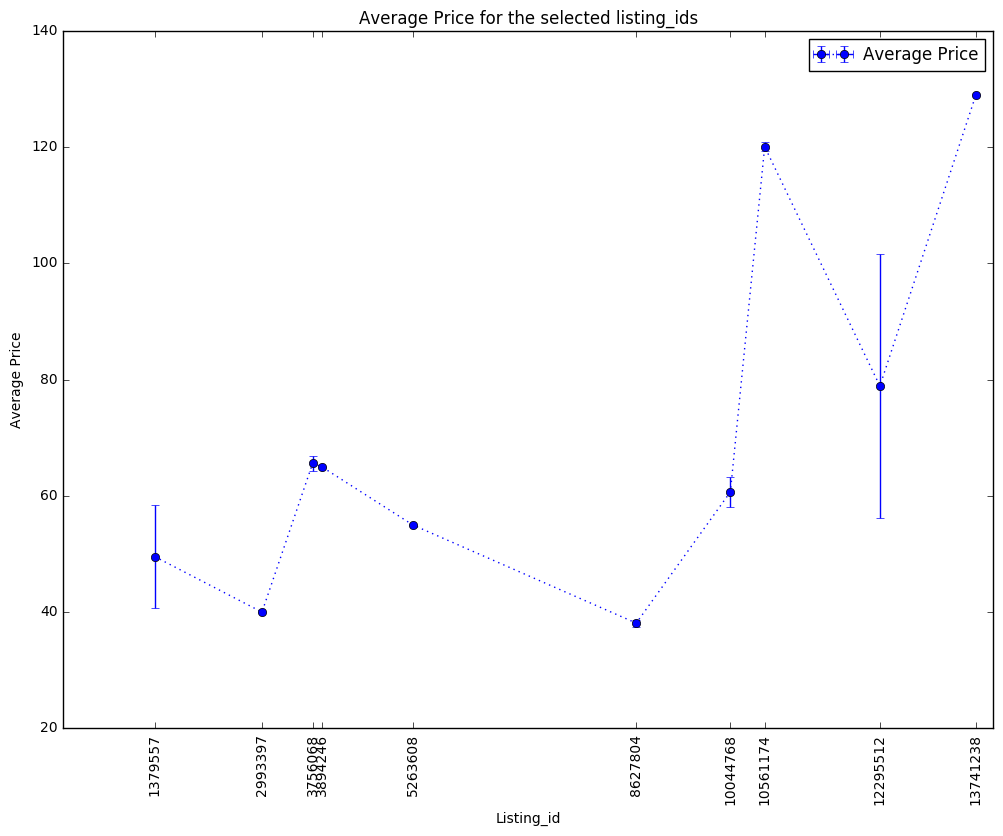

In [203]:
print("Ensure the listing_ids, avg_price, std_price are all sorted by 'listing_id' asc")
indexAsIntList = [int(x.strip()) for x in avgPriceDataFrame.avg_price.index.base]
indexAsIntList.sort()
avg_price = avgPriceDataFrame.sort().avg_price.values
stdPriceDataFrame = sampleListingIds.groupby(['listing_id']).std().rename(columns={'price_as_float':'std_price'})
std_price = stdPriceDataFrame.sort().std_price.values
print("")

print("Push the results intoa dataframe:")
listing_ids_data = {'listing_id': indexAsIntList,
                    'avg_price': avg_price,
                    'std_price': std_price}
df_listing_ids = pd.DataFrame(listing_ids_data, columns = ['listing_id', 'avg_price', 'std_price'])
print(df_listing_ids)

print("")
print("Plot the figure:")
plot_error_bars(df_listing_ids['listing_id'],df_listing_ids['avg_price'],df_listing_ids['std_price'],'Average Price')

#ensure the x-axis shows the listing_ids
xticks(indexAsIntList, rotation=90)

plot_data('Average Price for the selected listing_ids','Listing_id', 'Average Price','upper right')

4.Plot the average price (including standard deviation) of all the listings which have a standard deviation greater than 0 in your data



Get the Data:
   listing_id   avg_price  std_price
0     1379557   49.545455   8.877960
2     3756068   65.596026   1.340297
5     8627804   38.104167   0.587464
6    10044768   60.684932   2.529370
7    10561174  120.063492   0.795549
8    12295512   78.900000  22.773847

Plot the figure:


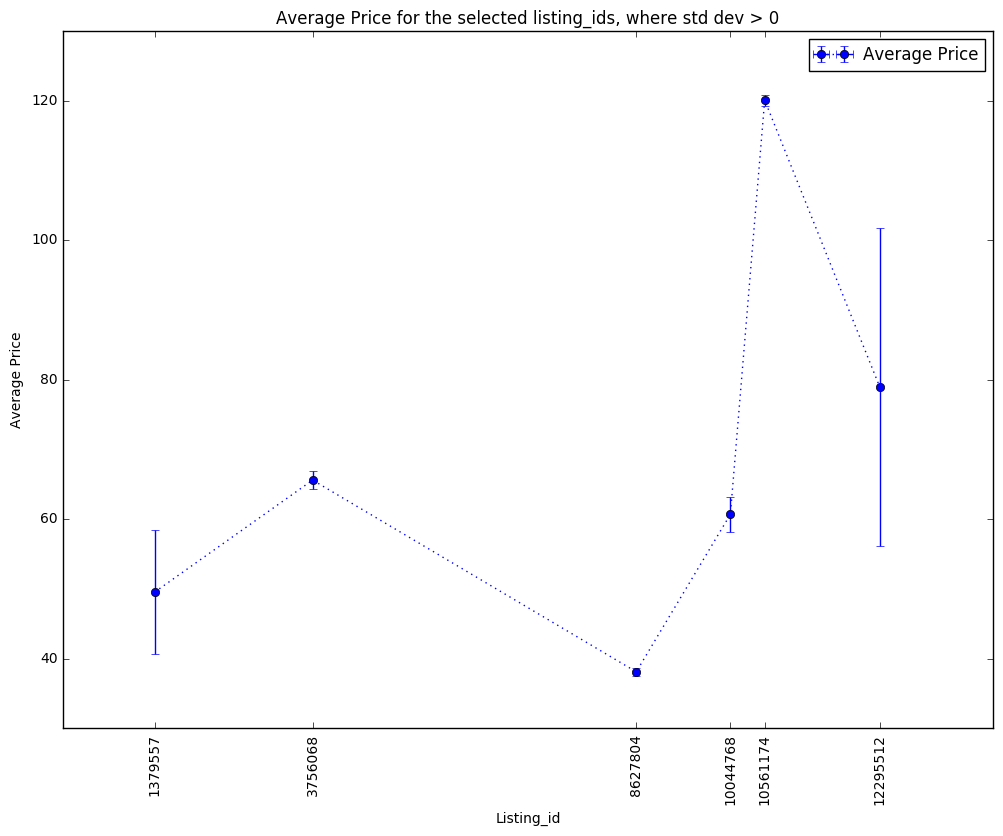

In [206]:
print("")
print("Get the Data:")
filtered = df_listing_ids[df_listing_ids['std_price']>0.0]
print(filtered)

print("")
print("Plot the figure:")
#plot_error_bars(filtered['listing_id'], filtered['avg_price'],filtered['std_price'],'Average Price')
plot_error_bars(filtered['listing_id'].values,filtered['avg_price'].values,filtered['std_price'].values,'Average Price')
#ensure the x-axis shows the listing_ids
xticks(filtered['listing_id'], rotation=90)
plot_data('Average Price for the selected listing_ids, where std dev > 0','Listing_id', 'Average Price','upper right')

# Part D  - Data Analysis (Continued)...
1.Plot the average price of listings over neighbourhoods and room types. 

-------------------------------------------------------------------------

In [193]:
print("Step1 - Let's prepapre the data....")
print("")

print("Get unique list of neighbourhood")
neighbourhood = df_listing['neighbourhood'].unique()
print(neighbourhood)
print("")

print("Get unique list of room_type")
room_type = df_listing['room_type'].unique()
print(room_type)
print("")

print("Get average price per neighbourhood and room_type")
df = df_listing.groupby(['neighbourhood','room_type'])['price'].mean()
print(df)
print("")

print("Build a list of average price per room_type foreach neighbourhood")
room_type_0_data = df.values[0::3]
room_type_1_data = df.values[1::3]
room_type_2_data = df.values[2::3]
print(room_type_0_data)
print(room_type_1_data)
print(room_type_2_data)
print("")

print("Build a two-dimension table and load it into a dataframe")
neighbourhood_col_name = 'Neighbourhood'
raw_data = {neighbourhood_col_name: neighbourhood,
            room_type[0]: room_type_0_data,
            room_type[1]: room_type_1_data,
            room_type[2]: room_type_2_data}

df = pd.DataFrame(raw_data, columns = [neighbourhood_col_name, room_type[0], room_type[1], room_type[2]])
print(df)

Step1 - Let's prepapre the data....

Get unique list of neighbourhood
['Batignolles-Monceau' 'Palais-Bourbon' 'Buttes-Chaumont' 'Opéra'
 'Entrepôt' 'Gobelins' 'Vaugirard' 'Reuilly' 'Louvre' 'Luxembourg' 'Élysée'
 'Temple' 'Ménilmontant' 'Panthéon' 'Passy' 'Observatoire' 'Popincourt'
 'Bourse' 'Buttes-Montmartre' 'Hôtel-de-Ville']

Get unique list of room_type
['Entire home/apt' 'Private room' 'Shared room']

Get average price per neighbourhood and room_type
neighbourhood        room_type      
Batignolles-Monceau  Entire home/apt     93.757537
                     Private room        56.287281
                     Shared room         45.344828
Bourse               Entire home/apt    120.281141
                     Private room       110.006757
                     Shared room         30.611111
Buttes-Chaumont      Entire home/apt     73.022326
                     Private room        44.977391
                     Shared room         33.787234
Buttes-Montmartre    Entire home/apt     7

Step2 - Let's construct the graph and show it....


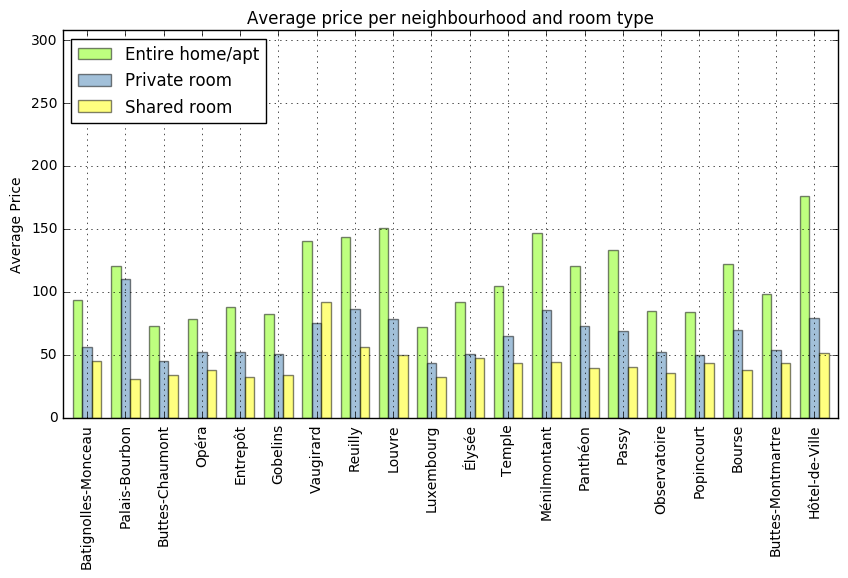

In [199]:
print("Step2 - Let's construct the graph and show it....")

# Setting the positions and width for the bars
pos = list(range(len(df[room_type[0]])))
width =.25

# Plotting the bars
fig, ax = plt.subplots(figsize=(10,5))
    
bar_plot(pos,df[room_type[0]],'Chartreuse',room_type[0])
bar_plot([p + width for p in pos],df[room_type[1]],'SteelBlue',room_type[1])
bar_plot([p + width*2 for p in pos],df[room_type[2]],'Yellow',room_type[2])

# Set the y axis label
ax.set_ylabel('Average Price')
# Set the title
ax.set_title('Average price per neighbourhood and room type')
# Set the position of the x ticks
ax.set_xticks([p + 1.5 * width for p in pos])
# Set the labels for the x ticks and rotation
ax.set_xticklabels(neighbourhood, rotation=90)
# Set the x-axis and y-axis limits
plt.xlim(min(pos)-width, max(pos)+width*4)
plt.ylim([0, max(df[room_type[0]] + df[room_type[1]] + df[room_type[2]])] )
df[room_type[0]]
# Add the legend and show the plot
plt.legend([room_type[0], room_type[1], room_type[2]], loc='upper left')
plt.grid()
plt.show()
